In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

In [2]:
usdInr = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/USDINR.csv')
usdInr.drop('Unnamed: 0', axis=1, inplace=True)
usdInr.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR,61.610101,61.341917,61.393506,61.400000,61.400000,61.400000,0.0,0.000000,0.000000,0.000000,61.7496,62.164424,61.334776
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR,61.627339,61.332157,61.493596,61.403725,61.401881,61.400945,0.0,0.007578,0.001516,0.006063,61.7496,62.164424,61.334776
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR,61.547724,61.499491,61.516284,61.407815,61.403983,61.402010,0.0,0.014466,0.004106,0.010361,61.7496,62.164424,61.334776
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR,61.567341,61.356586,61.504031,61.407155,61.403725,61.401901,0.0,0.010365,0.005358,0.005007,61.7496,62.164424,61.334776
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR,61.633775,61.348468,61.385332,61.413345,61.406919,61.403524,0.0,0.020914,0.008469,0.012445,61.7496,62.164424,61.334776


Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0683 - mae: 0.1678 - val_loss: 7.4448e-04 - val_mae: 0.0211
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0345 - val_loss: 0.0010 - val_mae: 0.0259
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0036 - val_mae: 0.0495
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0053 - val_mae: 0.0621
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0251 - val_loss: 0.0036 - val_mae: 0.0488
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2269e-04 - mae: 0.0223 - val_loss: 0.0043 - val_mae: 0.0559
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3964e-04 - mae: 0.0207 - val_loss: 0.0075 - val_mae: 0.0717
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0926e-04 - mae: 0.0206 - val_loss: 0.0061 - val_mae: 0.0653
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0075e-

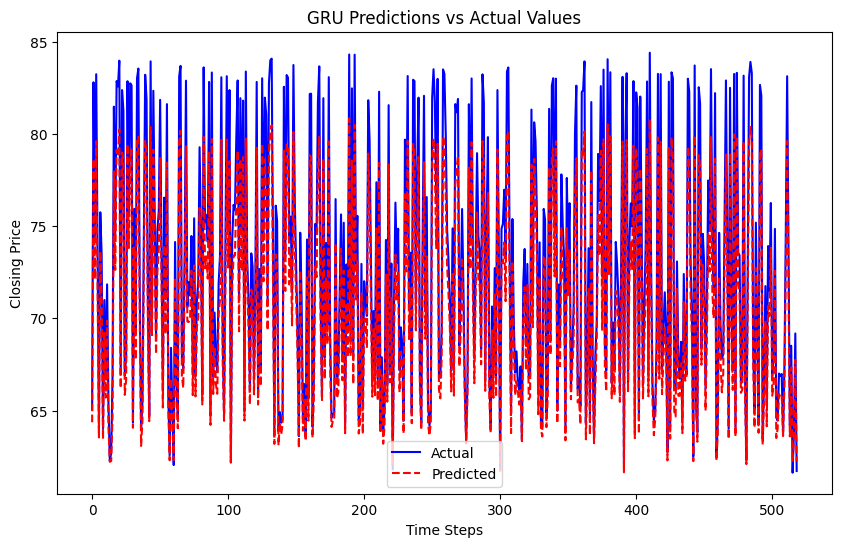

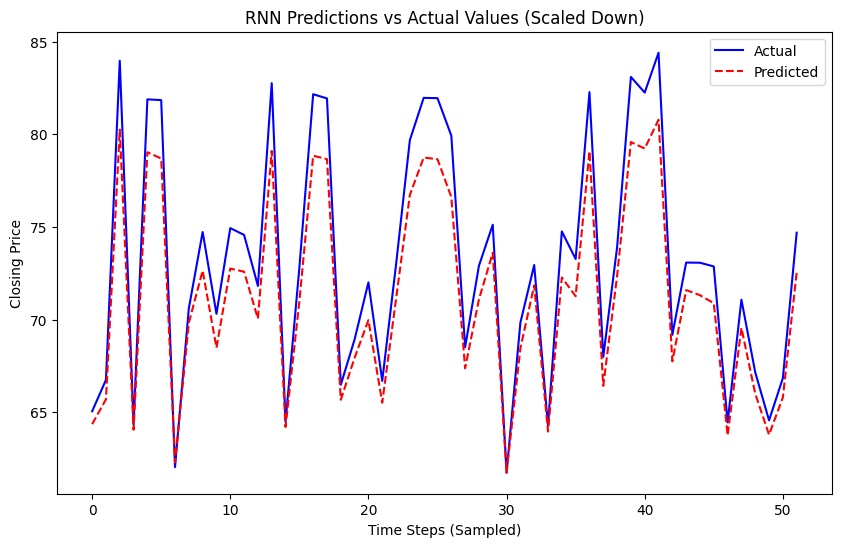

In [3]:
def cnn_lstm_model(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build CNN-LSTM hybrid model
    cnn_lstm_model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
        MaxPooling1D(2),
        Dropout(0.2),  # Regularization
        LSTM(64, activation='relu', return_sequences=False),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
    test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
    y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_cnn_lstm_rescaled)

    gru_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("GRU Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    # Example of selecting a smaller range of data for clarity:
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_cnn_lstm_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("RNN Predictions vs Actual Values (Scaled Down)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return gru_metrics

gru_metrics_df = cnn_lstm_model(usdInr)

Grid search

In [5]:
def grid_search_cnn_lstm(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Define the grid of hyperparameters to search over
    param_grid = {
        'conv_filters': [32, 64],
        'kernel_size': [3, 5],
        'pool_size': [2, 3],
        'lstm_units': [32, 64],
        'dropout_rate': [0.2, 0.3],
        'activation': ['relu', 'tanh'],
        'batch_size': [16, 32, 64],
        'epochs': [10, 20],
    }

    best_model = None
    best_r2 = -np.inf  # To store the best R2 score
    best_params = None

    # Grid search loop
    for params in ParameterGrid(param_grid):
        print(f"Testing combination: {params}")

        # Build the CNN-LSTM model with the current set of hyperparameters
        model = Sequential([
            Conv1D(filters=params['conv_filters'], kernel_size=params['kernel_size'], activation=params['activation'], input_shape=(sequence_length, X_train.shape[2])),
            MaxPooling1D(pool_size=params['pool_size']),
            LSTM(params['lstm_units'], activation=params['activation']),
            Dropout(params['dropout_rate']),
            Dense(32, activation=params['activation']),
            Dense(1)
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

        # Train the model
        model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_test, y_test), verbose=0)

        # Evaluate the model
        train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
        y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

        r2 = r2_score(y_test_rescaled, y_pred_rescaled)

        # Check if this combination of hyperparameters produces the best R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_params = params

        print(f"R2: {r2:.4f}")

    print(f"Best R2: {best_r2:.4f}")
    print(f"Best parameters: {best_params}")

    # Return the best model and parameters
    return best_model, best_params

# Run the grid search for CNN-LSTM hyperparameters
best_cnn_lstm_model, best_cnn_lstm_params = grid_search_cnn_lstm(usdInr)


Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9178
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9152
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9087
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8991
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2: 0.8926
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
R2: 0.8898
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9182
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9120
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9017
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9037
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8756
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9277
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.8859
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8823
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9451
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8773
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7910
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7242
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7232
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9126
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7207
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7525
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8244
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7254
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7877
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.6837
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8459
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8337
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7866
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
R2: 0.8327
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7975
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8151
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8842
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9021
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8990
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8865
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8545
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9198
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8988
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8537
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9032
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9321
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8963
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8424
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9526
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8577
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8896
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8963
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8422
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7891
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8272
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9281
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8476
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7709
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8457
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7622
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7007
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7373
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8309
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8675
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7472
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7096
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7939
Testing combination: {'activation': 'relu', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7554
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8826
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9017
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9250
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9123
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8987
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9013
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8854
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8843
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8901
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8615
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8968
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8836
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9069
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
R2: 0.8865
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9156
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9344
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7826
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8583
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8987
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7423
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7730
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9058
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9182
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8838
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7421
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7844
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8069
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7949
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7470
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7266
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8548
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7589
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8685
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8907
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9205
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9066
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8271
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8796
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9386
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8391
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9199
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8346
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8506
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9126
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.8987
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8925
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8753
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9086
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8221
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7666
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7622
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7898
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.7485
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8291
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8957
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7975
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7316
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7838
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.7910
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7977
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.6873
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.6881
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7439
Testing combination: {'activation': 'relu', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7975
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8388
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8756
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9824
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9325
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9020
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8495
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9278
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8848
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8726
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9174
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9340
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8752
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8857
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8890
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8691
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8964
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7806
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8467
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8226
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8148
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8335
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7189
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7859
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8372
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7826
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7490
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7769
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7916
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8475
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7999
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8261
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.7607
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8982
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8668
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9068
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8709
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8637
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9066
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8770
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9085
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8924
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8716
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9484
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8974
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9201
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8615
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9116
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9324
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8261
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8137
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9450
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8515
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7284
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7758
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7189
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7363
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8031
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.6759
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8602
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8586
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8012
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7268
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7899
Testing combination: {'activation': 'relu', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8170
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9877
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9938
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9948
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9936
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9952
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9929
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9728
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9934
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9950
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9958
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
R2: 0.9965
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
R2: 0.9955
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
R2: 0.9923
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9945
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9961
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9941
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9968
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9872
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
R2: 0.9967
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9932
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9947
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9861
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9963
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9855
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9924
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9949
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9954
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9958
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9901
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9923
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9931
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9924
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9958
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9929
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9939
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9888
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9828
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9930
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9929
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9934
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9959
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9945
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9966
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9885
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9920
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
R2: 0.9938
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9931
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9933
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9795
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9875
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9854
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9936
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9892
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9861
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9935
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9922
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9881
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9945
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9966
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
R2: 0.9952
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step
R2: 0.9906
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
R2: 0.9836
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
R2: 0.9959
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step
R2: 0.9932
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step
R2: 0.9945
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
R2: 0.9878
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9954
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9930
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step
R2: 0.9938
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2: 0.9724
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
R2: 0.9821
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
R2: 0.9924
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
R2: 0.9960
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
R2: 0.9951
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
R2: 0.9969
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
R2: 0.9959
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
R2: 0.9935
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2: 0.9911
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9914
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9945
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9921
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9922
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9951
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9924
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
R2: 0.9680
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9913
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9911
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9923
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9937
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9940
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9948
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9955
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9934
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9931
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9937
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9959
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9934
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9956
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9903
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9819
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
R2: 0.9913
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9956
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
R2: 0.9909
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9955
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9952
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9937
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9936
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9824
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9923
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
R2: 0.9921
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9876
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9959
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9905
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9954
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9925
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9965
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9943
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9964
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9950
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9957
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9914
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9956
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9927
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9946
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9916
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9938
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9937
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9940
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9919
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9952
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9917
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9958
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9961
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9946
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9950
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 590ms/step
R2: 0.9930
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9932
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9924
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9880
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9848
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9935
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9730
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9941
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9913
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9956
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9925
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9909
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9925
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9961
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9893
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9932
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9894
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9951
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 32, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9940
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9894
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9895
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9959
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9865
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9942
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9846
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9947
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9814
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9967
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9943
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9918
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9953
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9953
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9786
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9935
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9943
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9930
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9941
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9953
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9879
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9934
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9911
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2: 0.9948
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 10, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9839
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9954
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9945
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9920
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9862
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
R2: 0.9875
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 32, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9923
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 2}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9832
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'conv_filters': 64, 'dropout_rate': 0.3, 'epochs': 20, 'kernel_size': 5, 'lstm_units': 64, 'pool_size': 3}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9918
Best R2: 0.9969
Best parameters: {'activation': 'tanh', 'batch_size': 32, 'conv_filters': 32, 'dropout_rate': 0.2, 'epochs': 20, 'kernel_size': 3, 'lstm_units': 64, 'pool_size': 2}


In [6]:
best_cnn_lstm_params

{'activation': 'tanh',
 'batch_size': 32,
 'conv_filters': 32,
 'dropout_rate': 0.2,
 'epochs': 20,
 'kernel_size': 3,
 'lstm_units': 64,
 'pool_size': 2}

Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0591 - mae: 0.1677 - val_loss: 0.0017 - val_mae: 0.0315
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 9.9680e-04 - val_mae: 0.0253
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 5.4251e-04 - val_mae: 0.0173
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 4.8540e-04 - val_mae: 0.0167
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0262 - val_loss: 5.7804e-04 - val_mae: 0.0181
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 4.9430e-04 - val_mae: 0.0173
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4984e-04 - mae: 0.0241 - val_loss: 6.5808e-04 - val_mae: 0.0200
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0255 - val_loss: 3.8472e-04 - val_mae: 0.0148
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

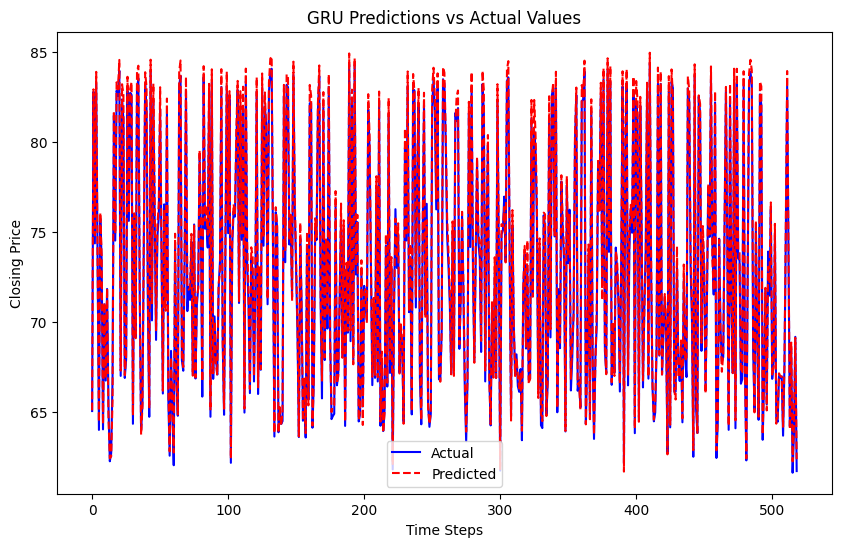

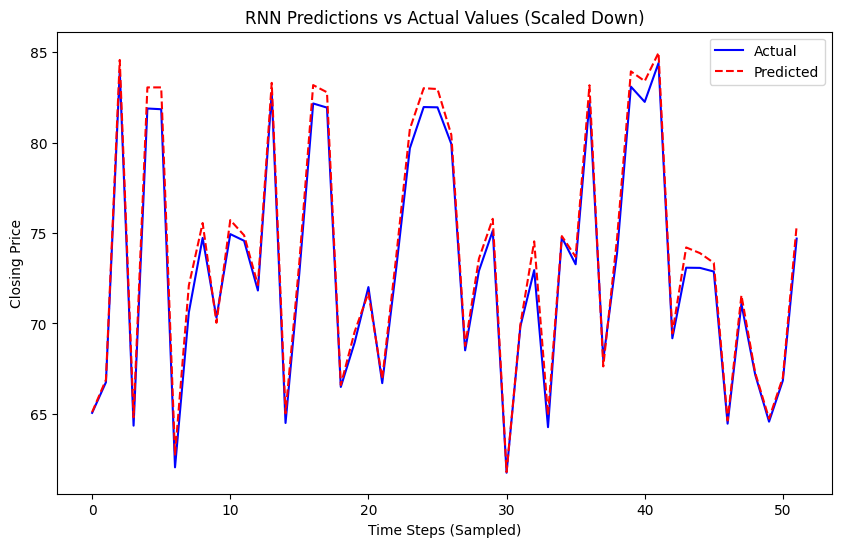

In [8]:
def cnn_lstm_withBestParams_model(usdInr, best_params):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    cnn_lstm_model = Sequential([
         Conv1D(best_params['conv_filters'], best_params['kernel_size'], 
               activation=best_params['activation'], 
               input_shape=(sequence_length, X_train.shape[2])),
        MaxPooling1D(pool_size=best_params['pool_size']),
        Dropout(best_params['dropout_rate']),  # Regularization
        LSTM(best_params['lstm_units'], activation=best_params['activation'], return_sequences=False),
        Dense(32, activation=best_params['activation']),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
    test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
    y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_cnn_lstm_rescaled)

    gru_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("GRU Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    # Example of selecting a smaller range of data for clarity:
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_cnn_lstm_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("RNN Predictions vs Actual Values (Scaled Down)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return gru_metrics

gru_metrics_withBestParams_df = cnn_lstm_withBestParams_model(usdInr, best_cnn_lstm_params)

In [4]:
gru_metrics_df

,Metric,Value
0,MAE,1.939629
1,MSE,5.009522
2,MAPE,0.025499
3,R2,0.889735


In [9]:
gru_metrics_withBestParams_df

,Metric,Value
0,MAE,0.469530
1,MSE,0.319130
2,MAPE,0.006299
3,R2,0.992976
